In [9]:
# Importing Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load Data
data = pd.read_csv(r"C:\Users\aksha\Downloads\feed.csv")  # Adjust path as needed

# Feature Columns (input variables)
feature_cols = ['field1', 'field2', 'field3', 'field4', 'field5', 'field6']

# Extract Features (X) and Target Columns (y)
X = data[feature_cols]  # Input features (all the fields)
y = data[feature_cols]  # Output labels (same as the input features in this case)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to Train and Evaluate Model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Ensure correct handling of multi-output targets
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Initialize a dictionary to store individual target classification reports
    individual_reports = {}
    accuracies = []
    
    # Compute classification report and accuracy for each target
    for target in y_test.columns:
        # Calculate the classification report for each target column
        target_report = classification_report(y_test[target], y_pred[:, y_test.columns.get_loc(target)], zero_division=0)
        individual_reports[target] = target_report
        
        # Calculate the accuracy for each target column
        target_accuracy = accuracy_score(y_test[target], y_pred[:, y_test.columns.get_loc(target)])
        accuracies.append(target_accuracy)
    
    # Calculate overall accuracy (average of all target accuracies)
    overall_accuracy = sum(accuracies) / len(accuracies)
    
    return overall_accuracy, individual_reports

# --- Model 1: Random Forest Classifier --- 
rf_model = RandomForestClassifier(random_state=42)
multi_rf_model = MultiOutputClassifier(rf_model, n_jobs=-1)  # Apply MultiOutputClassifier
rf_accuracy, rf_report = train_and_evaluate_model(multi_rf_model, X_train, X_test, y_train, y_test)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Classification Report for each target:")
for target, report in rf_report.items():
    print(f"\nTarget: {target}\n{report}")

# Save the Random Forest Model
with open('../models/rf_model.pkl', 'wb') as file:
    pickle.dump(multi_rf_model, file)

# --- Model 2: Support Vector Machine ---
svm_model = SVC(random_state=42)
multi_svm_model = MultiOutputClassifier(svm_model, n_jobs=-1)
svm_accuracy, svm_report = train_and_evaluate_model(multi_svm_model, X_train, X_test, y_train, y_test)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Support Vector Machine Classification Report for each target:")
for target, report in svm_report.items():
    print(f"\nTarget: {target}\n{report}")

# Save the SVM Model
with open('../models/svm_model.pkl', 'wb') as file:
    pickle.dump(multi_svm_model, file)

# --- Model 3: Logistic Regression ---
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
multi_logreg_model = MultiOutputClassifier(logreg_model, n_jobs=-1)
logreg_accuracy, logreg_report = train_and_evaluate_model(multi_logreg_model, X_train, X_test, y_train, y_test)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Classification Report for each target:")
for target, report in logreg_report.items():
    print(f"\nTarget: {target}\n{report}")

# Save the Logistic Regression Model
with open('../models/logreg_model.pkl', 'wb') as file:
    pickle.dump(multi_logreg_model, file)

# --- Model 4: Gradient Boosting Classifier ---
gb_model = GradientBoostingClassifier(random_state=42)
multi_gb_model = MultiOutputClassifier(gb_model, n_jobs=-1)
gb_accuracy, gb_report = train_and_evaluate_model(multi_gb_model, X_train, X_test, y_train, y_test)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report for each target:")
for target, report in gb_report.items():
    print(f"\nTarget: {target}\n{report}")

# Save the Gradient Boosting Model
with open('../models/gb_model.pkl', 'wb') as file:
    pickle.dump(multi_gb_model, file)

# --- Model 5: K-Nearest Neighbors ---
knn_model = KNeighborsClassifier()
multi_knn_model = MultiOutputClassifier(knn_model, n_jobs=-1)
knn_accuracy, knn_report = train_and_evaluate_model(multi_knn_model, X_train, X_test, y_train, y_test)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classification Report for each target:")
for target, report in knn_report.items():
    print(f"\nTarget: {target}\n{report}")

# Save the KNN Model
with open('../models/knn_model.pkl', 'wb') as file:
    pickle.dump(multi_knn_model, file)

# --- Model 6: Neural Network ---
mlp_model = MLPClassifier(random_state=42, max_iter=1000)
multi_mlp_model = MultiOutputClassifier(mlp_model, n_jobs=-1)
mlp_accuracy, mlp_report = train_and_evaluate_model(multi_mlp_model, X_train, X_test, y_train, y_test)
print("Neural Network Accuracy:", mlp_accuracy)
print("Neural Network Classification Report for each target:")
for target, report in mlp_report.items():
    print(f"\nTarget: {target}\n{report}")

# Save the Neural Network Model
with open('../models/mlp_model.pkl', 'wb') as file:
    pickle.dump(multi_mlp_model, file)


Random Forest Classifier Accuracy: 0.775
Random Forest Classifier Classification Report for each target:

Target: field1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       0.50      1.00      0.67         2
          19       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1

    accuracy                           0.75        20
   macro avg       0.50      0.52      0.50        20
weighted avg       0.75      0.75      0.74        20


Target: field2
              precision    recall  f1-score   supp

In [10]:
# Importing Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load Data
data = pd.read_csv(r"C:\Users\aksha\Downloads\feed.csv")  # Adjust path as needed

# Feature Columns (input variables)
feature_cols = ['field1', 'field2', 'field3', 'field4', 'field5', 'field6']

# Extract Features (X) and Target Columns (y)
X = data[feature_cols]  # Input features (all the fields)
y = data[feature_cols]  # Output labels (same as the input features in this case)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to Train and Evaluate Model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Ensure correct handling of multi-output targets
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Initialize a dictionary to store individual target classification reports
    individual_reports = {}
    accuracies = []
    
    # Compute classification report and accuracy for each target
    for target in y_test.columns:
        # Calculate the classification report for each target column
        target_report = classification_report(y_test[target], y_pred[:, y_test.columns.get_loc(target)], zero_division=0)
        individual_reports[target] = target_report
        
        # Calculate the accuracy for each target column
        target_accuracy = accuracy_score(y_test[target], y_pred[:, y_test.columns.get_loc(target)])
        accuracies.append(target_accuracy)
    
    # Calculate overall accuracy (average of all target accuracies)
    overall_accuracy = sum(accuracies) / len(accuracies)
    
    return overall_accuracy, individual_reports

# --- Model 1: Random Forest Classifier --- 
rf_model = RandomForestClassifier(random_state=42)
multi_rf_model = MultiOutputClassifier(rf_model, n_jobs=-1)  # Apply MultiOutputClassifier
rf_accuracy, rf_report = train_and_evaluate_model(multi_rf_model, X_train, X_test, y_train, y_test)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Classification Report for each target:")
for target, report in rf_report.items():
    print(f"\nTarget: {target}\n{report}")

# Save the Random Forest Model
with open('../models/rf_model.pkl', 'wb') as file:
    pickle.dump(multi_rf_model, file)

# --- Model 2: Support Vector Machine ---
svm_model = SVC(random_state=42)
multi_svm_model = MultiOutputClassifier(svm_model, n_jobs=-1)
svm_accuracy, svm_report = train_and_evaluate_model(multi_svm_model, X_train, X_test, y_train, y_test)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Support Vector Machine Classification Report for each target:")
for target, report in svm_report.items():
    print(f"\nTarget: {target}\n{report}")

# Save the SVM Model
with open('../models/svm_model.pkl', 'wb') as file:
    pickle.dump(multi_svm_model, file)

# --- Model 3: Logistic Regression ---
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
multi_logreg_model = MultiOutputClassifier(logreg_model, n_jobs=-1)
logreg_accuracy, logreg_report = train_and_evaluate_model(multi_logreg_model, X_train, X_test, y_train, y_test)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Classification Report for each target:")
for target, report in logreg_report.items():
    print(f"\nTarget: {target}\n{report}")

# Save the Logistic Regression Model
with open('../models/logreg_model.pkl', 'wb') as file:
    pickle.dump(multi_logreg_model, file)

# --- Model 4: Gradient Boosting Classifier ---
gb_model = GradientBoostingClassifier(random_state=42)
multi_gb_model = MultiOutputClassifier(gb_model, n_jobs=-1)
gb_accuracy, gb_report = train_and_evaluate_model(multi_gb_model, X_train, X_test, y_train, y_test)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report for each target:")
for target, report in gb_report.items():
    print(f"\nTarget: {target}\n{report}")

# Save the Gradient Boosting Model
with open('../models/gb_model.pkl', 'wb') as file:
    pickle.dump(multi_gb_model, file)

# --- Model 5: K-Nearest Neighbors ---
knn_model = KNeighborsClassifier()
multi_knn_model = MultiOutputClassifier(knn_model, n_jobs=-1)
knn_accuracy, knn_report = train_and_evaluate_model(multi_knn_model, X_train, X_test, y_train, y_test)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("K-Nearest Neighbors Classification Report for each target:")
for target, report in knn_report.items():
    print(f"\nTarget: {target}\n{report}")

# Save the KNN Model
with open('../models/knn_model.pkl', 'wb') as file:
    pickle.dump(multi_knn_model, file)

# --- Model 6: Neural Network ---
mlp_model = MLPClassifier(random_state=42, max_iter=1000)
multi_mlp_model = MultiOutputClassifier(mlp_model, n_jobs=-1)
mlp_accuracy, mlp_report = train_and_evaluate_model(multi_mlp_model, X_train, X_test, y_train, y_test)
print("Neural Network Accuracy:", mlp_accuracy)
print("Neural Network Classification Report for each target:")
for target, report in mlp_report.items():
    print(f"\nTarget: {target}\n{report}")

# Save the Neural Network Model
with open('../models/mlp_model.pkl', 'wb') as file:
    pickle.dump(multi_mlp_model, file)


Random Forest Classifier Accuracy: 0.775
Random Forest Classifier Classification Report for each target:

Target: field1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         3
          18       0.50      1.00      0.67         2
          19       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         1

    accuracy                           0.75        20
   macro avg       0.50      0.52      0.50        20
weighted avg       0.75      0.75      0.74        20


Target: field2
              precision    recall  f1-score   supp

C:\Users\aksha\AppData\Local\Temp\ipykernel_14040\247659774.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


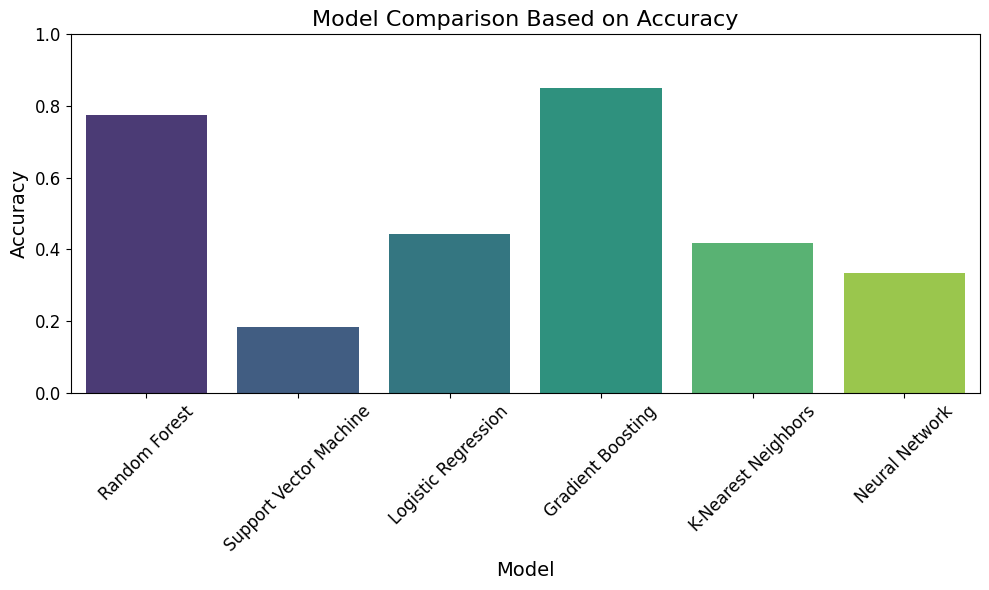

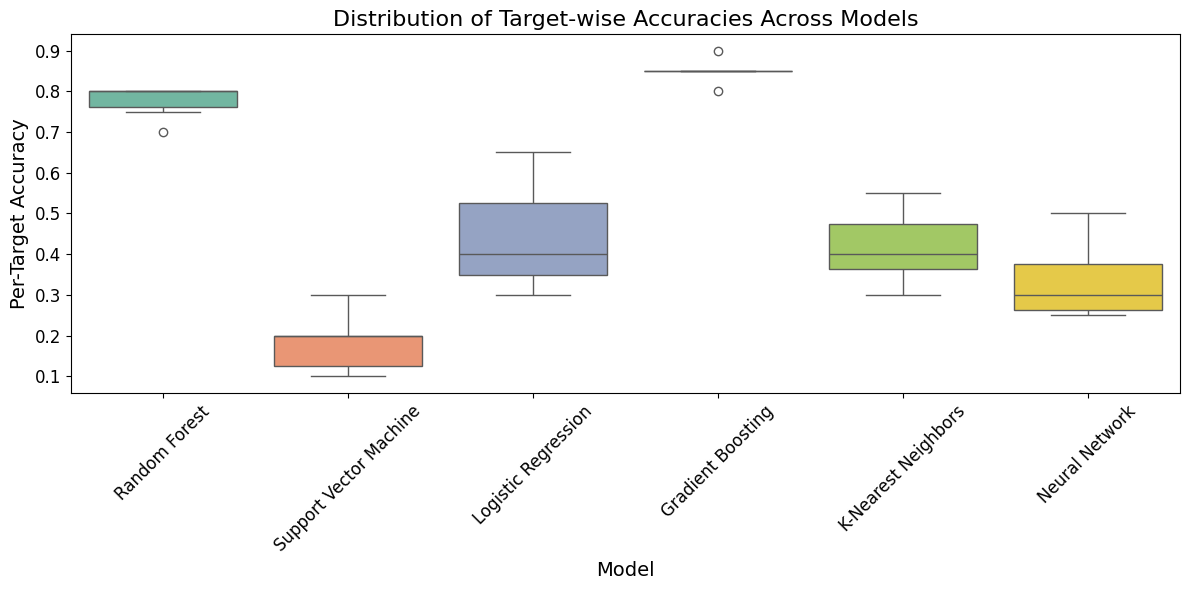

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define models and their respective accuracies
model_names = [
    "Random Forest",
    "Support Vector Machine",
    "Logistic Regression",
    "Gradient Boosting",
    "K-Nearest Neighbors",
    "Neural Network"
]

# Fetch accuracies from your models
accuracies = [
    rf_accuracy,
    svm_accuracy,
    logreg_accuracy,
    gb_accuracy,
    knn_accuracy,
    mlp_accuracy
]

# --- Plotting Overall Accuracies ---
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Comparison Based on Accuracy", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# --- Optional: Highlighting target-wise performance ---
# This step assumes `individual_reports` contains target-specific reports for each model
# For example:
# individual_reports = [rf_report, svm_report, logreg_report, gb_report, knn_report, mlp_report]

# Collecting per-target accuracy across models
target_accuracies = {model: [] for model in model_names}

for model_name, model_report in zip(model_names, [rf_report, svm_report, logreg_report, gb_report, knn_report, mlp_report]):
    for target, report in model_report.items():
        if target != "accuracy":  # Skip overall accuracy if included in reports
            # Extract per-target accuracy from each report
            lines = report.split("\n")  # Split the string report into lines
            accuracy_line = [line for line in lines if "accuracy" in line]  # Find accuracy
            if accuracy_line:
                accuracy_value = float(accuracy_line[0].split()[-2])  # Extract accuracy
                target_accuracies[model_name].append(accuracy_value)

# Converting the dictionary to a DataFrame for visualization
target_acc_df = pd.DataFrame(target_accuracies)

if not target_acc_df.empty:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=target_acc_df, palette="Set2")
    plt.title("Distribution of Target-wise Accuracies Across Models", fontsize=16)
    plt.xlabel("Model", fontsize=14)
    plt.ylabel("Per-Target Accuracy", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
